__Задание.__  Исследовать данные, построить графики и схемы, позволяющие получить
информацию и визуализировать данные, обучить модель регрессии или классификации,
оценить качество модели. Оформить документацию на github.com (код, данные, отчет,
презентация).
Предлагается рассмотреть следующие датасеты:
* https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
* https://www.kaggle.com/c/titanic/data
* https://www.kaggle.com/wenruliu/adult-income-dataset
* https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine
* https://www.kaggle.com/budincsevity/szeged-weather
* https://www.kaggle.com/hugodarwood/epirecipes
* https://www.kaggle.com/mhdzahier/travel-insurance
* https://www.kaggle.com/hussainaliarif/amazon-best-seller-june-2021-products
* https://www.kaggle.com/residentmario/ramen-ratings
* https://www.kaggle.com/astefopoulos/earthquakes-in-greece-19012018

In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns

In [71]:
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Modelling Helpers
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import Normalizer, scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

Используем датасет по ссылке:
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

### About this dataset
* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* caa: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
   - Value 1: typical angina
   - Value 2: atypical angina
   - Value 3: non-anginal pain
   - Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved

* target : 0= less chance of heart attack 1= more chance of heart attack

In [72]:
data = pd.read_csv('data/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
data.shape

(303, 14)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [75]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [76]:
data.isnull().sum() #проверяем на наличие пропусков каждый столбец

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Пропусков значений нет.

__Output - целевая переменная__, принимает 0 или 1 в зависимости от отсутствия предрасположенности (0) или наличия предрасположенности (1) к заболеваниям сердца. Перед нами стоит задача классификации тестовой выборки (присвоение 0 или 1 по 13 признакам)

In [77]:
cat_list = ['sex','exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall'] #Категориальные переменные
con_list = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'] #Дискретный переменные (принимают численный значения)

In [78]:
data_dummies = pd.get_dummies(data, columns=cat_list)
data_dummies.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,exng_0,exng_1,...,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,1,1,0,...,1,0,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,56,120,236,178,0.8,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

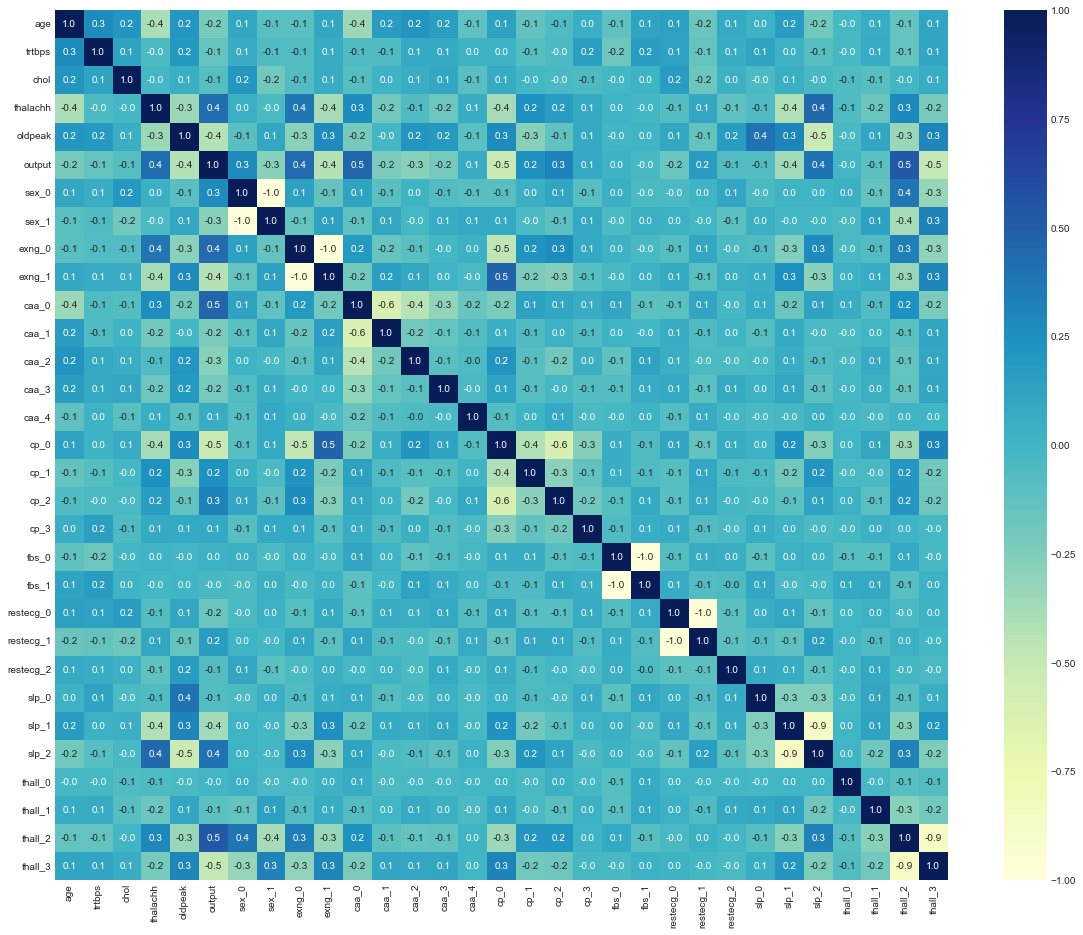

In [79]:
data_corr = data_dummies.corr()
plt.figure(figsize=(20,16))
sns.heatmap(data_corr, fmt='.1f', annot=True, cmap='YlGnBu')

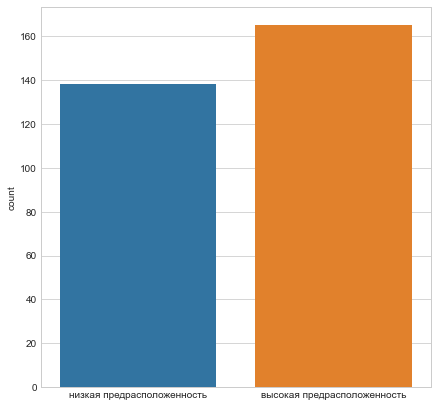

In [80]:
fig = plt.figure(figsize=(7,7))
ax = sns.countplot(data=data, x='output')
ax.set_xlabel('')
ax.set_xticklabels(['низкая предрасположенность', 'высокая предрасположенность']);

countplot для категориальных переменных:

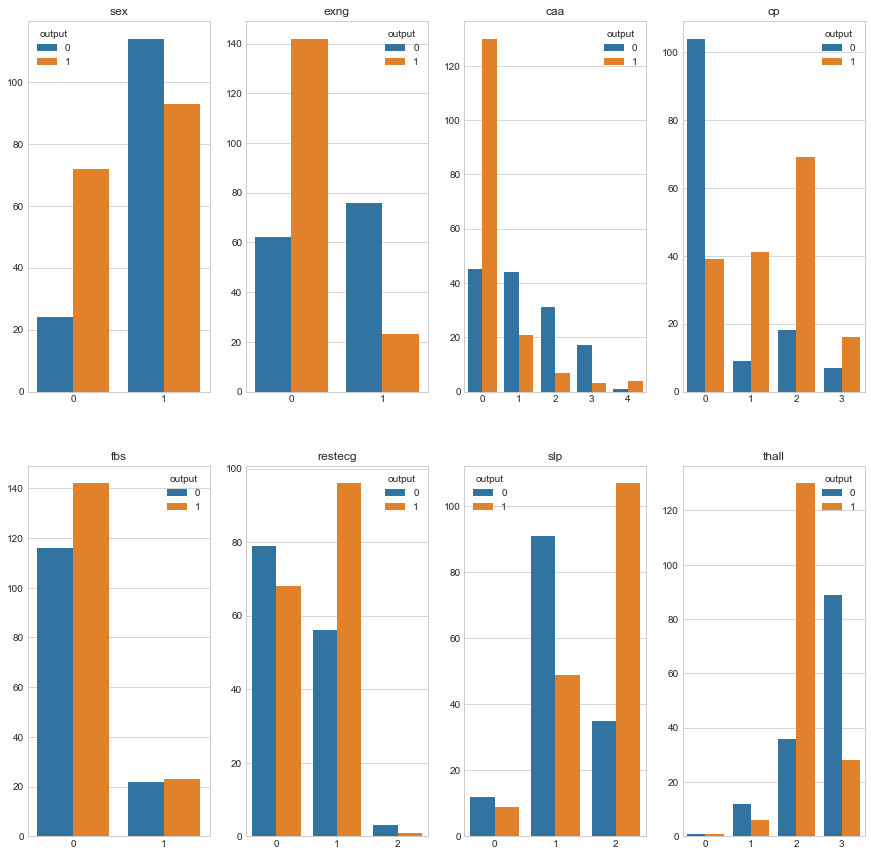

In [81]:
fig = plt.figure(figsize=(15,15))
for i, col in enumerate(cat_list): #enumerate - перебирает номера (i) и сами значения под этим номером (col)
    axi = plt.subplot(2, 4, i+1) # делим рисунок на 2 строки по 4 рисунка в каждой, i+1 - номер рисунка
    sns.countplot(ax=axi, data=data, x=col, hue='output').set_title(col)
    axi.set_xlabel('')
    axi.set_ylabel('')

Для непрерывных переменных:

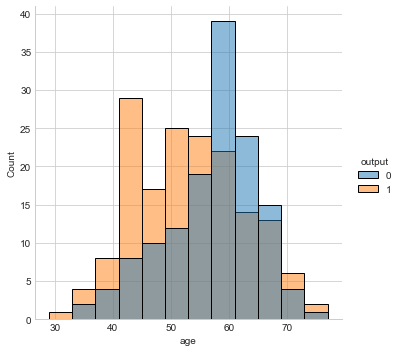

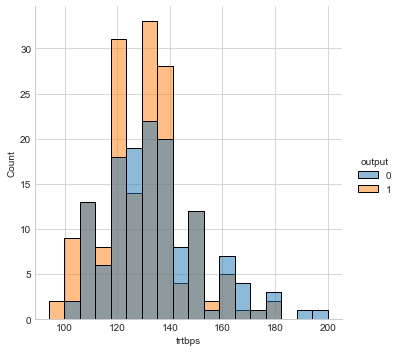

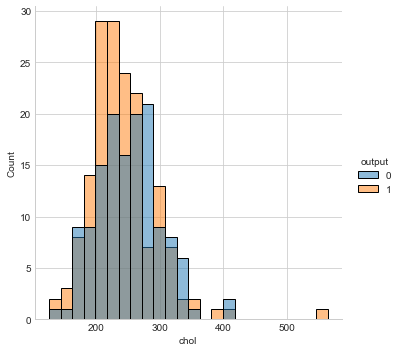

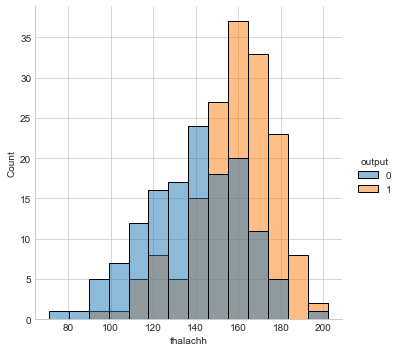

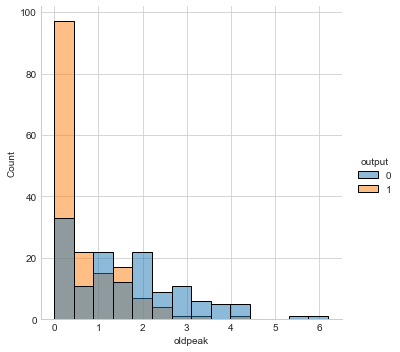

In [82]:
for i, col in enumerate(con_list[::]): #здесь также перебор всех числовых переменных, кроме возраста (его выше рассмотрели)
    axi = sns.displot(data=data, x=col, hue='output')

Видно сильное увеличение предрасположенности в районе 60 лет. Люди с большим значением thalachh (максимальный сердечный ритм) также более предрасположены.

Разделим выборку на обучающую и тестовую:

In [83]:
train_X, valid_X, train_y, valid_y = train_test_split(data_dummies.drop('output', axis=1), data_dummies['output'], test_size=0.25, random_state=13)
train_X.shape, valid_X.shape

((227, 30), (76, 30))

Для линейных методов матрицу объекты-признаки необходимо предварительно масштабировать
(то есть привести каждый признак к одному и тому же масштабу). Для этого можно воспользоваться StandardScaler

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)
#производим масштабирование признаков на 2 выборках
train_X = scaler.transform(train_X)
valid_X = scaler.transform(valid_X)

In [85]:
model = LogisticRegression(max_iter=1000)
model.fit( train_X , train_y )
print ("Линейная регрессия:","на обучающей выборке - ",model.score( train_X , train_y ), ", на тестовой выборке - ", model.score( valid_X , valid_y ))

Линейная регрессия: на обучающей выборке -  0.8766519823788547 , на тестовой выборке -  0.8026315789473685


Визуализируем веса, соответствующие признакам. Если признаки отмасштабированы, то чем больше вес по модулю - тем более сильным является признак.

<Figure size 2160x2160 with 0 Axes>

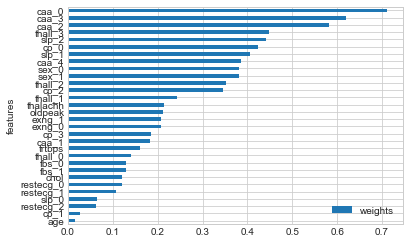

In [86]:
sorted_weights = sorted(zip(abs(model.coef_).ravel(), data_dummies.drop('output', axis=1).columns), reverse=False)
#zip - сортируем веса вместе с названиями
# .ravel() - возращает плоский массив
weights = [x[0] for x in sorted_weights]
#перебираем строки, а именнно их [0] элементы
features = [x[1] for x in sorted_weights]
df = pd.DataFrame({'features': features, 'weights':weights})
fig = plt.figure(figsize=(30,30))
ax = df.plot.barh(x='features', y='weights', rot=0)
#rot - вращение подписей

Теперь попробуем другие классификаторы:

In [87]:
model = DecisionTreeClassifier()
model.fit( train_X , train_y )
print ("Деревья решений:","на обучающей выборке - ",model.score( train_X , train_y ), ", на тестовой выборке - ", model.score( valid_X , valid_y ))

Деревья решений: на обучающей выборке -  1.0 , на тестовой выборке -  0.618421052631579


In [88]:
model = KNeighborsClassifier()
model.fit( train_X , train_y )
print ("K ближайших соседей:","на обучающей выборке - ",model.score( train_X , train_y ), ", на тестовой выборке - ", model.score( valid_X , valid_y ))

K ближайших соседей: на обучающей выборке -  0.8942731277533039 , на тестовой выборке -  0.75


In [89]:
model = GaussianNB()
model.fit( train_X , train_y )
print ("на обучающей выборке - ",model.score( train_X , train_y ), ", на тестовой выборке - ", model.score( valid_X , valid_y ))

на обучающей выборке -  0.8105726872246696 , на тестовой выборке -  0.8026315789473685


In [90]:
model = SVC(max_iter=1000)
model.fit( train_X , train_y )
print ("на обучающей выборке - ",model.score( train_X , train_y ), ", на тестовой выборке - ", model.score( valid_X , valid_y ))

на обучающей выборке -  0.9251101321585903 , на тестовой выборке -  0.7894736842105263


In [96]:
model = LinearSVC(max_iter=10000)
model.fit( train_X , train_y )
print ("на обучающей выборке - ",model.score( train_X , train_y ), ", на тестовой выборке - ", model.score( valid_X , valid_y ))

на обучающей выборке -  0.8810572687224669 , на тестовой выборке -  0.8026315789473685


In [92]:
model = RandomForestClassifier()
model.fit( train_X , train_y )
print ("на обучающей выборке - ",model.score( train_X , train_y ), ", на тестовой выборке - ", model.score( valid_X , valid_y ))

на обучающей выборке -  1.0 , на тестовой выборке -  0.75


In [93]:
model = GradientBoostingClassifier()
model.fit( train_X , train_y )
print ("на обучающей выборке - ",model.score( train_X , train_y ), ", на тестовой выборке - ", model.score( valid_X , valid_y ))

на обучающей выборке -  1.0 , на тестовой выборке -  0.7763157894736842


Наилучший результат на тестовой выборке показали:
1. Линейная регрессия - 80,26%
2. GaussianNB - 80,26%
3. LinearSVC  - 80,26%